# Module 3

To reach the goal of calculate the area of the tumor, several steps have been followed.
A preprocessing has been applied on the original image in order to decrease the number of details without losing the edges. It was done with a median filter followed by morphological operations opening and closing.
Then, the pre-built canny function from scikit-image has been applied (with the same parameters than in the notebook with examples). It gives the main countours of the image. The use of canny is acceptable because the tumor is well marked in comparision with the other countours. So, with a good preprocessing it allows to only have the edge of the tumor as closed countour.
Finally the watershed function of scikit image is applied on the previous result. It gives the segmentation of the image because the only closed countour is that of the tumor.
The markers are obtained by doing like the example in the notebook with peak_local_max() (with the same parameters). 
The tumor countains approximately 3496 pixels. With that number an area of 46.2346 cm² is deduced.


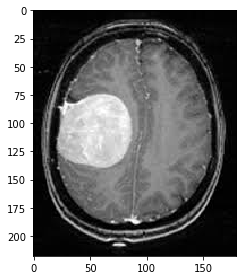

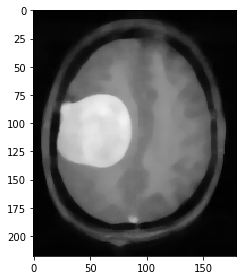

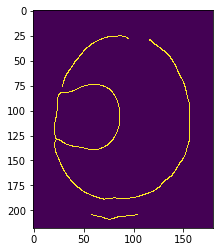

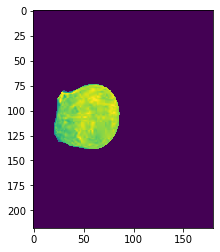

Number of pixels :  3496
area =  46.2346


In [3]:
from matplotlib import pyplot as plt
from skimage.io import imread,imshow
from skimage.feature import peak_local_max, canny
from skimage.filters.rank import median, gradient
from skimage.morphology import disk, opening,closing, watershed
from skimage.measure import label
from skimage import img_as_ubyte
import numpy as np

#Display original image
image1 = img_as_ubyte(imread("mri_brain.jpg", as_gray=True))
plt.figure()
imshow(image1)
plt.show()

form = disk(5)

#preprocess
image3=median(image1, form)
image4 = closing(opening(image3,form),form)

#Image after preprocess
plt.figure()
imshow(image3)
plt.show()

#Canny with the same parameters than in the example nootebook
image5 = canny(image4, sigma=2., low_threshold=50, high_threshold=70)

#Display image after canny
plt.figure()
plt.imshow(image5)
plt.show()

grad = gradient(image5,form)
markers = peak_local_max(grad.max()-grad,threshold_rel=0.5, min_distance=60,indices=False)
markers = label(markers)
ws = watershed(grad, markers)

image6 = image1

#count the number of pixels
count = 0
for i in range(ws.shape[0]):
    for j in range(ws.shape[1]):
        if ws[i,j] == 2:
            count+=1
        else:
            image6[i,j]=0

#Display segmented element
plt.figure()
plt.imshow(image6)
plt.show()


print("Number of pixels : ", count)
print("area = ", (0.115**2) * count)